# Layered Structure of Cortex Explains Reversal Dynamics in Bistable Perception

In [1]:
import numpy as np
import pylab as plt

# import dynamic mean field model (DMF)
from DMF import get_params, set_stimulation, set_vis, update

# import analysis functions
from analysis import dominance_time, alternation_rate, fit_gamma, running_mean

# jupyter notebook specific
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython import display

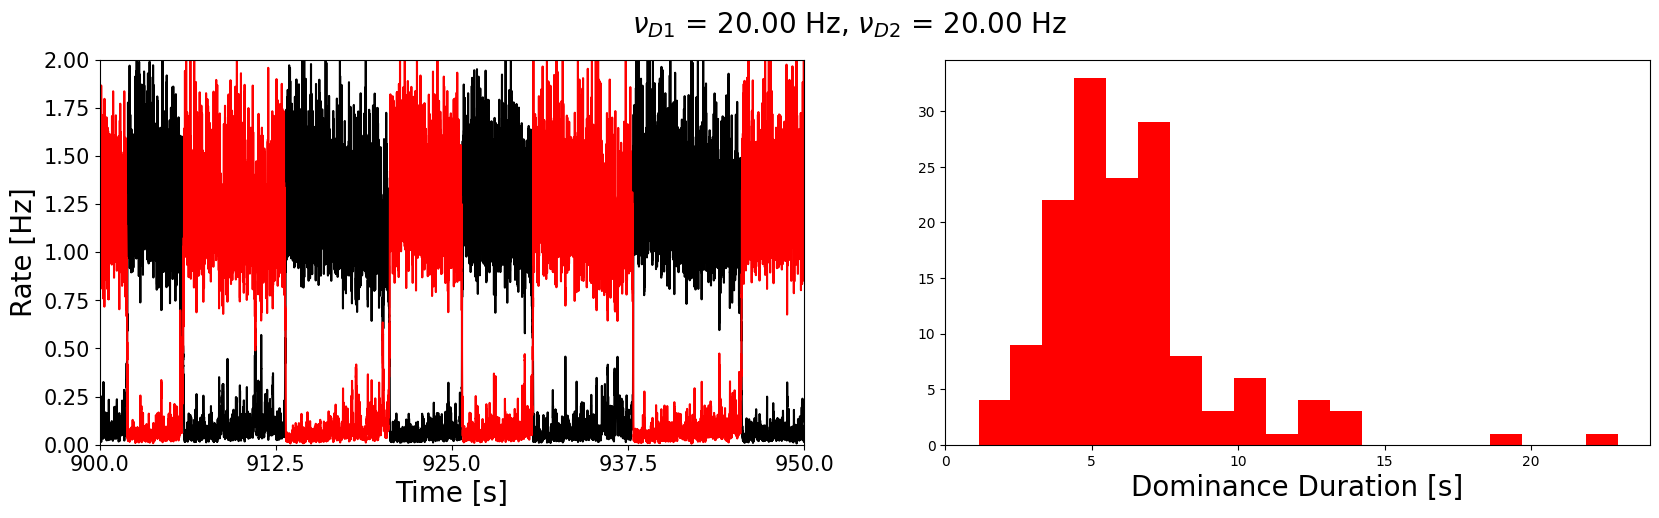

In [2]:
# set parameters for simulation
area = 'MT'
params = get_params(J_local=0.13, J_lateral=0.172, area='MT')

state = {}
M = params['M']   # number of populations
state['I'] = np.zeros(M)    # input current
state['A'] = np.zeros(M)    # adaptation
state['H'] = np.zeros(M)    # membrane potential
state['R'] = np.zeros(M)    # rate
state['N'] = np.zeros(M)    # noise

dt = 1e-4
t_sim = 1000
T = int(t_sim/dt)

stim = np.zeros(M)

# simulation
R = np.zeros((M, T))    # array for saving rate

nu_D1 = 20.0
nu_D2 = 20.0
stim = set_vis(stim, column='H', nu=nu_D1, params=params)
stim = set_vis(stim, column='V', nu=nu_D2, params=params)

# stim = set_stimulation(stim, column='H', layer='L23', nu=20, params=params)
# stim = set_stimulation(stim, column='V', layer='L23', nu=20, params=params)

# stim = set_stimulation(stim, column='H', layer='L4', nu=20, params=params)
# stim = set_stimulation(stim, column='V', layer='L4', nu=20, params=params)

# stim = set_stimulation(stim, column='H', layer='L5', nu=20, params=params)
# stim = set_stimulation(stim, column='V', layer='L5', nu=20, params=params)

# stim = set_stimulation(stim, column='H', layer='L6', nu=20, params=params)
# stim = set_stimulation(stim, column='V', layer='L6', nu=20, params=params)


for t in range(T):
    state = update(state, params, stim)

    R[:, t] = state['R']

    if t % 500000 == 0:
        fig = plt.figure(figsize=(20, 5))
        plt.suptitle(r'$\nu_{D1}$ = %.2f Hz, $\nu_{D2}$ = %.2f Hz' % (nu_D1, nu_D2), fontsize=20)
        interval = 500000
        plt.subplot(1, 2, 1)
        plt.plot(np.arange(np.maximum(t-interval, 0), t), R[0, t-interval:t], 'k', alpha=1)
        plt.plot(np.arange(np.maximum(t-interval, 0), t), R[8, t-interval:t], 'r', alpha=1)
        plt.xlim(np.maximum(t-interval, 0), t)
        plt.ylim(0, 2)
        plt.xlabel('Time [s]', fontsize=20)
        plt.ylabel('Rate [Hz]', fontsize=20)
        plt.xticks(plt.linspace(np.maximum(t-interval, 0), t, 5), np.round(plt.linspace(np.maximum(t-interval, 0), t, 5)*dt, 1), fontsize=15)
        plt.yticks(fontsize=15)

        plt.subplot(1, 2, 2)
        DT = dominance_time(R[0, 500:t], R[8, 500:t], dt=dt, cutoff=.1)  # dominance duration in seconds
        counts, bin_edges = np.histogram(DT, bins=20)
        plt.hist(DT, bins=20, color='r')
        plt.xlabel('Dominance Duration [s]', fontsize=20)
        plt.xlim(left=0)

        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.close('all')

In [3]:
# compute statistics

DT = dominance_time(R[0, 500:], R[8, 500:],   cutoff=.1, dt=dt)     # dominance duration in seconds
AL = alternation_rate(R[0, 500:], R[8, 500:], cutoff=.1, dt=dt)     # alternation rate in Hz

print('Mean Dominance Duration: '   + str(np.round(np.mean(DT), 2)))
print('Alternation Rate: '          + str(np.round(np.mean(AL), 2)))

Mean Dominance Duration: 6.37
Alternation Rate: 0.18
